

上次授课简单地介绍了优达学城机器学习课程框架、先修基础知识、编程环境配置以及常用的工具包等。本次课程主要介绍机器学习知识应用所涉及到的指标选择、验证评估方法以及常用的流程。

## 一、模型评估指标

我们在建立机器学习模型时，需要明确“怎样判断模型好与否？什么时候可以停止优化模型？”，这时候需要选择合适的评估指标(evaluation metrics)，来度量模型优劣的衡量值。不同的模型适用于不同的评估指标，下面主要围绕监督学习里面的分类模型和回归模型来介绍。

### 1.分类模型指标

分类问题是通过输入数据预测类型标签(label)，其结果是离散值。比如垃圾邮件分类就是一个二元分类问题，邮件或者被模型预测为“垃圾邮件”，或者“不是垃圾邮件”。分类问题常用的指标有准确度、混淆矩阵(confusion matrix）等，具体举例来说明（引用自Derek示例）。

```
假如某个医院有100个人待诊，其中20个人是病患，其他80人均是正常。医生目标是找出所有病患，假设病患标签为阳性"positive"，正常人标签为阴性"negative"。现在某医生用某检测方法发现50个人呈阳性反映,其中20人是真正病患,另外还错误的把30个正常人也当作病患挑选出来了. 作为评估者的你需要来评估(evaluation)下他的工作.
```


- 准确度（accuracy）：对于给定的测试数据集，分类器正确分类的样本数与总样本数之比[参见李航《统计学习方法》]。
$accuracy = \frac {correct_predictions}{total_data_points}$，比如刚才100人中，50人呈阳性反应，剩下50人是阴性，阳性中病患是20人，阴性中判定正确的是50人，总共正确的是（20 + 50） = 70人，30名正常人错分为病患，准确率则为70%。由准确率，我们的确可以在一些场合，从某种意义上得到一个分类器是否有效，但它并不总是能有效的评价一个分类器的工作[ARGCV](https://argcv.com/articles/1036.c)。比如，在疾病检测中，如果人群中某种疾病的发病率只有0.1%，即使医生直接将所有病人都预测为阴性，其准确度也能达到99.9%，但是这样就会使很多真正患病的病人错过最佳治疗时机。所以又提出了精准率(precision)、召回率（recall）等指标。

![image](pic/precision&recall.png)

上图中（引用自[维基百科](https://en.wikipedia.org/wiki/Precision_and_recall))，TP表示病人判断为阳性，例子中就是正确的判定"这位是病人"；FN表示假阴性，阳性判定为阴性，即病患判定为正常人；FP表示假阳性，阴性判断为阳性，也就是正常人错判为病患；TN，阴性判断为阴性，这里就是正常热被判断为正常人。
- 精准率（precision)：$P=\frac{TP}{TP+FP}$，阳性占判定为阳性数的比例。在这个例子中就是诊断正确病患数占呈阳性反应人数比例，正确判断的病患TP=20，假阳性FP=30，那么精准率就是20/(20+30)=40%。理想的精准率为1.

- 召回率（recall）：$R=\frac{TP}{TP+FN}$，正确判定的阳性占实际上阳性数的比例。再这个例子中就是正确检测出来病患数量占所实际病患总数的比例，正确判断的病患TP=20，假阴性FN=0，召回率即为100%。理想的召回率为1。

- F1值：$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$，F1值就是精确值和召回率的调和均值，这里$2*0.4*1/(1+0.4)=4/7$。


In [88]:
#创建100个病人状态和预测状态
import numpy as np
np.random.seed(2)
index = np.arange(100)
np.random.shuffle(index)
patient_status = np.ones(100)
patient_pred = np.ones(100)
patient_status[:20] = 0
patient_pred[:50] = 0
patient_pred, patient_status = patient_pred[index], patient_status[index]
print(u'Patient Status:', patient_status)#20个病人
print(u'Predicted Status:', patient_pred)#医生预测的结果

(u'Patient Status:', array([ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.]))
(u'Predicted Status:', array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  

In [89]:
accuracy = metrics.accuracy_score(patient_status, patient_pred)#准确度
precision = metrics.precision_score(patient_status, patient_pred)#精准度
recall = metrics.recall_score(patient_status, patient_pred)#召回率
confusion_matrix = metrics.confusion_matrix(patient_status, patient_pred)#混淆矩阵
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion_matrix:', confusion_matrix)

('Accuracy:', 0.69999999999999996)
('Precision:', 1.0)
('Recall:', 0.625)
('Confusion_matrix:', array([[20,  0],
       [30, 50]]))


- 混淆矩阵（confusion matrix）：在机器学习领域，混淆矩阵又称为可能性表格或是错误矩阵。它是一种特定的矩阵用来呈现算法性能的可视化效果，通常是监督学习。其每一列代表预测值，每一行代表的是实际的类别。这个名字来源于它可以非常容易的表明多个类别是否有混淆（也就是一个class被预测成另一个class）[引用自[cnblog](http://blog.csdn.net/vesper305/article/details/44927047)]。如下图:
![confusion_matrix](pic/confusionmatrix.png)

上图中，实际上有8只猫，但是只判定正确了5只，有三只被判定成了狗；实际上6只狗，2只被判定成了猫，1只被判定成了兔子；13只兔子，2只被判定成了狗，其他都判定正确。其他常用的指标还有ROC和AUC，有兴趣的可参看[相关的文档](https://www.douban.com/note/284051363/)。下面是个例子：

In [74]:
#引用自http://www.cnblogs.com/itdyb/p/5833352.html
from sklearn import datasets
####加载数据集
iris = datasets.load_iris()

In [76]:
print(iris.feature_names)
print('*'*30)
print("Feature Values:")
print(iris_data[:6])
print('*'*30)
print('Target Label:')
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
******************************
Feature Values:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]]
******************************
Target Label:
['setosa' 'versicolor' 'virginica']


In [108]:
###训练模型
#将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
iris_train, iris_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=42)
#利用逻辑回归
from sklearn import linear_model
regr=linear_model.LogisticRegression()
regr.fit(iris_train, target_train)
#预测
prediction = regr.predict(iris_test)

In [109]:
#计算各类指标
from sklearn import metrics
accuracy = metrics.accuracy_score(prediction, target_test)#正确度
confusion_matrix = metrics.confusion_matrix(prediction, target_test)#混淆矩阵

In [110]:
print('Accuracy:', accuracy)
print('Confusion_matrix:', confusion_matrix)

('Accuracy:', 0.97333333333333338)
('Confusion_matrix:', array([[29,  0,  0],
       [ 0, 21,  0],
       [ 0,  2, 23]]))


### 2.回归模型指标
回归模型就是通过输入特征数据预测其输出，输出值是连续类型的。比如房价预测可以是100万到200万之间任意一个数值。
- 均方误差(mean squared error)：$\sum_{i=1}^{n}(\hat y_i - y_i)^2/n$，也就是预测值与实际值差平方和的平均值。比较常用的回归指标，但是对异常点比较敏感。
- 平均绝对误差(mean absolute error):$\sum_{i=1}^n |\hat y_i - y_i|/n$,也就是预测值与实际值差绝对值的平均值。
- 决定系数R^2：表示目标值方差多大程度上可以由属性值方差来预测。其区间通常在（0,1）之间。0表示还不如什么都不预测，直接取均值的情况，而1表示所有预测跟真实结果完美匹配的情况。
$R^2 = 1 - \frac {SS_{res}}{SS_{tot}}$

In [90]:
####加载数据集
import numpy as np
diabetes=datasets.load_diabetes()
diabetes.data.shape

(442L, 10L)

In [91]:
####加载数据集
diabetes=datasets.load_diabetes()
####数据划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.3, random_state=1)

###训练模型
from sklearn import tree
#训练指标为mse
regr=tree.DecisionTreeRegressor(criterion='mse', random_state=1)
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)

In [92]:
###计算指标值
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
metrics = [mean_absolute_error, mean_squared_error, r2_score]
values = [metric(prediction, y_test) for metric in metrics]
print('Mean Absolute Error:')
print(round(values[0], 3))
print('Mean Squared Error:')
print(round(values[1], 3))
print('R2:')
print(round(values[2], 3))

Mean Absolute Error:
69.519
Mean Squared Error:
7870.992
R2:
-0.698


### 3.过拟合&欠拟合


首先介绍偏差(bias)和方差(variance)的概念。
bias和variance分别从两个方面来描述了我们学习到的模型与真实模型之间的差距。Bias是 “用所有可能的训练数据集训练出的所有模型的输出的平均值” 与 “真实模型”的输出值之间的差异；Variance则是“不同的训练数据集训练出的模型”的输出值之间的差异，知乎链接：https://www.zhihu.com/question/27068705/answer/82132134。

机器学习中，欠拟合指的是模型训练指标值和预测指标值都比较差，过拟合指的是模型在训练数据上表现很好而在测试数据上表现很差。以下是知乎[一篇帖子](https://www.zhihu.com/question/27068705/answer/35151681)上的示意图。
![bias_variance](pic/error.png)

再看三张图片，这三张图片是线性回归模型 拟合的函数和训练集的关系

- 第一张图片拟合的函数和训练集误差较大，我们称这种情况为 欠拟合
- 第二张图片拟合的函数和训练集误差较小，我们称这种情况为 合适拟合
- 第三张图片拟合的函数完美的匹配训练集数据，我们称这种情况为 过拟合
![underfitting_overfitting](pic/overfitting.png)
![underfitting_overfitting](pic/overfitting2.png)
![underfitting_overfitting](pic/overfitting3.png)

## 二、模型验证方法

模型训练是基于训练集数据来优化目标函数，如果我们把已有的所有数据全部当成训练集进行训练，可能最后的训练指标值效果很好，但是不了解其在未知数据上的表现。经验的做法就是在其他独立数据上检验已训练好的模型的泛化能力。

### 1.Holdout验证

将原始数据随机分为两组,一组做为训练集,一组做为验证集,利用训练集训练分类器,然后利用验证集验证模型,记录最后的分类准确率为此Hold-OutMethod下分类器的性能指标.此种方法的好处的处理简单,只需随机把原始数据分为两组即可,其实严格意义来说Hold-Out Method并不能算是CV,因为这种方法没有达到交叉的思想,由于是随机的将原始数据分组,所以最后验证集分类准确率的高低与原始数据的分组有很大的关系,所以这种方法得到的结果其实并不具有说服性[[CSDN博客](http://blog.csdn.net/chl033/article/details/4671750)]。

In [ ]:
####数据划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.3, random_state=1)

### 2.交叉验证

将原始数据分成K组(一般是均分)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型，用这K个模型最终的验证集的分类准确率的平均数作为此K-CV下分类器的性能指标。K一般大于等于2，实际操作时一般从3开始取，只有在原始数据集合数据量小的时候才会尝试取2。K-CV可以有效的避免过学习以及欠学习状态的发，最后得到的结果也比较具有说服性。
![cross_validation](pic/cross_validation2.jpg)

In [93]:
#输出指标值
def OutputMetrics(values):
    print('*'*40)
    print('Mean Absolute Error:')
    print(round(values[0], 3))
    print('Mean Squared Error:')
    print(round(values[1], 3))
    print('R2:')
    print(round(values[2], 3))

In [100]:
#选取K折交叉
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=2, shuffle=True)
regr=tree.DecisionTreeRegressor(random_state=1)
#将样本分成5份，依次留一份作为验证数据集，其他作为测试数据集
for train_index, test_index in kf.split(diabetes.data):
    X_train, X_test = diabetes.data[train_index], diabetes.data[test_index]
    y_train, y_test = diabetes.target[train_index], diabetes.target[test_index]  
    #训练模型
    regr.fit(X_train, y_train)
    prediction = regr.predict(X_test) 
    values = [metric(prediction, y_test) for metric in metrics]
    OutputMetrics(values)

****************************************
Mean Absolute Error:
65.584
Mean Squared Error:
6430.528
R2:
-0.096
****************************************
Mean Absolute Error:
61.787
Mean Squared Error:
6138.326
R2:
0.005
****************************************
Mean Absolute Error:
62.989
Mean Squared Error:
6060.557
R2:
-0.017
****************************************
Mean Absolute Error:
68.0
Mean Squared Error:
7374.409
R2:
-0.175
****************************************
Mean Absolute Error:
65.0
Mean Squared Error:
7086.705
R2:
-0.33


In [105]:
#更简单的方法
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
clf = regr#还是用前面的决策树模型
scoring = make_scorer(mean_absolute_error)#定义指标
scores = cross_val_score(clf, diabetes.data, diabetes.target, cv=5, scoring=scoring)
scores

array([ 61.62921348,  66.93258427,  63.54545455,  58.14772727,  68.53409091])

## 三、网格搜索

网格搜索（grid search）是一种搜索方法，通过搜寻参数空间找出使指标值最大化的参数组合。这里的参数实际上是超参数(hyperparameter)，比如在回归中$Y = WX$，写成$y = w_1x_1 + w_2x_2+w_3x_3+w_0$，我们求解的参数是每个变量$x_i$对应的权重$w_i$，但是模型最高次数是1次还是2次这就是超参数；神经网络中，我们需要求解的参数是每个神经元网络节点的权重，但是网络的层数、神经元的个数也是未知的、需要预先指定，这些就是超参数。具体可参考Alice Zheng的新书《Evaluating Machine Learning Models》

![neuralnetwork](pic/neuralnetworks.png)

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
####数据划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, test_size=0.3, random_state=1)
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
metrics.accuracy_score(clf.predict(X_test), y_test)

1.0

In [112]:
#最终挑选出来的参数
clf.estimator

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

最终挑选出来的参数C=1，kernel=‘rbf'。

## 四、机器学习应用流程

我们在应用机器学习技术解决实际问题时，可能没有现成的数据、整洁的数据，也没有指定的模型，也不知怎样的结果才能达到要求。这里介绍一个通用的工作流程，关于数据处理方面可以参考下印度Analytics Vidhya的[博客](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)。

### 1. 数据获取

数据获取的途径有很多，可以直接利用sklearn里面现成的数据包，也可以从政府、教育或者数据科学网站如Kaggle网站上下载，还可以从网站上爬取（参加[scrapy](https://scrapy.org/))。下面的数据是从机器学习P0项目里面下载的。

In [31]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
features = titanic.drop('Survived', axis=1)
target = titanic['Survived']
features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.数据探索

拿到数据后，我们需要看看数据是否是规整的，有哪些属性(feature)，各属性统计特性如何，是否存在偏态分布，是否与目标值相关？可以使用统计描述、绘制直方图、散点图形式来查看特性。

In [32]:
#属性统计描述值
features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
#属性基本信息，里面有缺失值
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


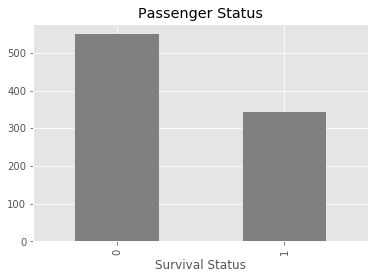

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
target.value_counts().plot(kind='bar', color='gray')
plt.xlabel('Survival Status')
plt.title('Passenger Status')

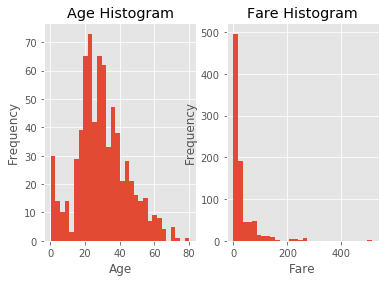

In [35]:
plt.subplot(1, 2, 1)
features['Age'].plot(kind='hist', bins=30)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.subplot(1, 2, 2)
features['Fare'].plot(kind='hist', bins=30)
plt.title('Fare Histogram')
plt.xlabel('Fare')

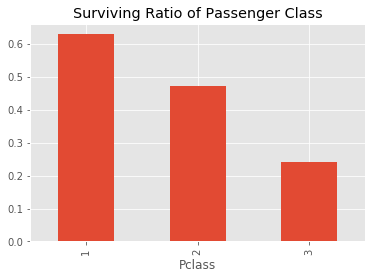

In [36]:
target.groupby(features['Pclass']).mean().plot(kind='bar')
plt.title('Surviving Ratio of Passenger Class')

### 3.数据预处理

在数据探索基础上，对数据进行处理。比如对属性进行归一化处理、创建新的属性，维数较高可以考虑选取部分属性或者降维。

In [37]:
#将Pclass转换成字符
features['Pclass'] = features['Pclass'].astype('category')
#用中位数来填充年纪的缺失值
features['Age'] = features['Age'].fillna(method='pad')
#去掉属性
features = features.drop(['Embarked', 'Cabin', 'Ticket'], axis=1)

In [38]:
#提取头衔如Mr., Mrs.
import re
find_title = re.compile(r', (.*\.) ')
def extract_title(name):
    title = None
    if name:
        title = find_title.findall(name)
    if title:
        return title[0]
    return None
##find_title.findall(a)
features['Name'] = features['Name'].map(extract_title)

In [39]:
name_dict = features['Name'].value_counts()
name_dict

Mr.                          517
Miss.                        182
Mrs.                         124
Master.                       40
Dr.                            7
Rev.                           6
Major.                         2
Col.                           2
Mlle.                          2
Lady.                          1
Don.                           1
the Countess.                  1
Mme.                           1
Sir.                           1
Jonkheer.                      1
Mrs. Martin (Elizabeth L.      1
Ms.                            1
Capt.                          1
Name: Name, dtype: int64

In [40]:
title_index = name_dict < 10
other_titles = name_dict[title_index].index
other_titles = list(other_titles)
features['Name'] = features['Name'].replace(other_titles, 'other')

In [41]:
other_titles

['Dr.',
 'Rev.',
 'Major.',
 'Col.',
 'Mlle.',
 'Lady.',
 'Don.',
 'the Countess.',
 'Mme.',
 'Sir.',
 'Jonkheer.',
 'Mrs. Martin (Elizabeth L.',
 'Ms.',
 'Capt.']

In [42]:
features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,3,Mr.,male,22.0,1,0,7.2500
2,1,Mrs.,female,38.0,1,0,71.2833
3,3,Miss.,female,26.0,0,0,7.9250
4,1,Mrs.,female,35.0,1,0,53.1000
5,3,Mr.,male,35.0,0,0,8.0500


In [43]:
#将类型属性数值化
features = pd.get_dummies(features[['Pclass', 'Age', 'Sex','Fare']])
features.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,
1,22.0,7.2500,0,0,1,0,1
2,38.0,71.2833,1,0,0,1,0
3,26.0,7.9250,0,0,1,1,0
4,35.0,53.1000,1,0,0,1,0
5,35.0,8.0500,0,0,1,0,1


### 4. 模型和指标选择

根据问题的类型和数据特点选择适当的指标和模型。上面的是一个监督分类问题，所以我们可以使用决策树、支持矢量机等模型分类。

In [44]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, test_size=0.3, random_state=1)

In [47]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt.fit(feature_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

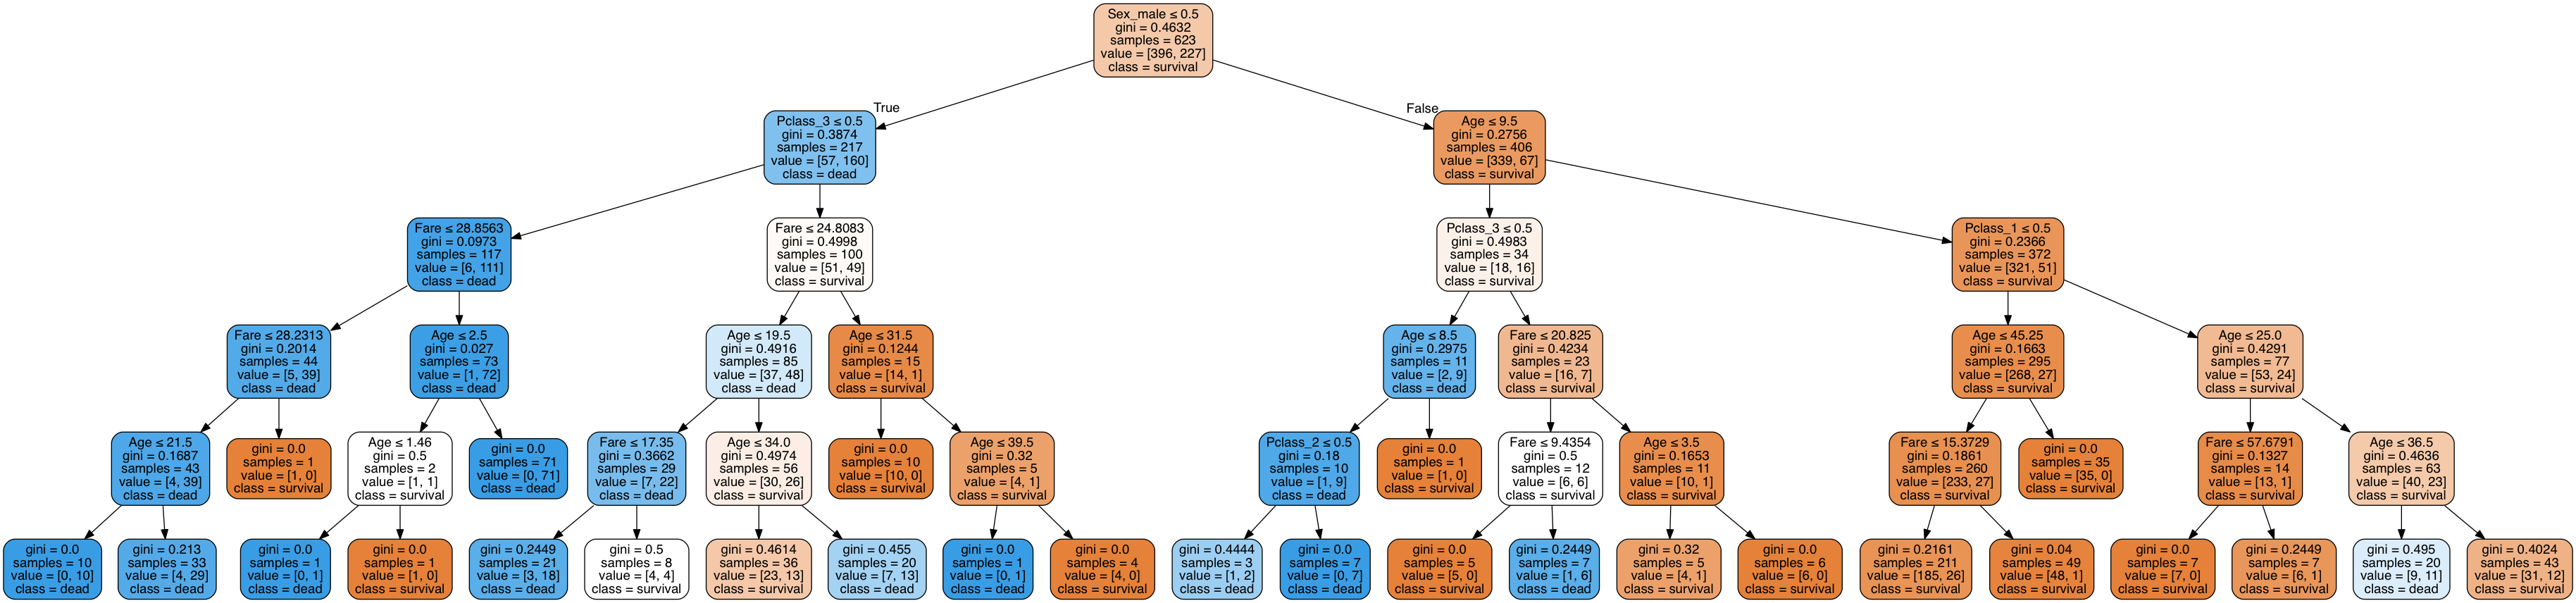

In [50]:
#绘图，需要预先安装pydotplus工具包和graphviz程序
import pydotplus 
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=features.columns,  
                         class_names=['survival', 'dead'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("iris.pdf") 
#dir(graph)
from IPython.display import Image  
Image(graph.create_png())

In [264]:
#测试集上的准确度
metrics.accuracy_score(dt.predict(feature_test), target_test)

0.73880597014925375

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(feature_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [263]:
#测试集上的准确度
metrics.accuracy_score(rf.predict(feature_test), target_test)

0.76119402985074625

### 5.模型优化及验证

模型训练完之后并不是终点，我们首先要看看模型指标值是否达到预期目的，尝试不同方法来进一步提升模型表现。如果模型欠拟合，要考虑调整参数、重新选择属性、更换模型；如果过拟合，可以考虑减少模型复杂度，比如去掉一些属性、降低模型复杂度或者采用正则化(regularization)方式。

才外，我们还需要检验模型的鲁棒性和泛化能力，测试模型在不同数据集、不同参数复杂度上的表现，看模型是否一如既往地表现稳定。

理想的情形是模型训练测试指标值达到最优，比如分类模型能够准确率100%最好，但是很多时候经过艰难的尝试发现最终测试结果可能低于90%。这时候，我们需要找到一个基准值，比如查阅相关资料，如果其他学者在该问题上花费了九牛二虎之力才取得92%的结果，那么即使你取得89%也是比较大的收获。

In [255]:
#利用网格搜索来提升分类精度
dt = tree.DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': range(1, 10)}
clf = GridSearchCV(rf, parameters)
clf.fit(feature_train, target_train)
metrics.accuracy_score(clf.predict(feature_test), target_test)

0.77611940298507465

In [256]:
clf.estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [257]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

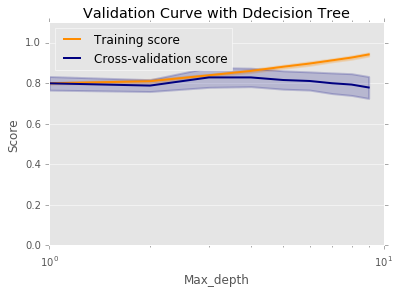

In [258]:
plt.title("Validation Curve with Ddecision Tree")
plt.xlabel("Max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(max_depths, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depths, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depths, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()##画图引用自sklearn官方文档

## 五、监督学习的几种模型介绍